
# Лабораторная работа №3: "Обработка признаков (часть 2)"
**ИУ5-24М вань хао**  
**Задание:**  
Выбрать набор данных (датасет), содержащий категориальные и числовые признаки и пропуски в данных.

Для выполнения следующих пунктов можно использовать несколько различных наборов данных

Для выбранного датасета (датасетов) на основе материалов лекций решить следующие задачи:

масштабирование признаков (не менее чем тремя способами);   
обработку выбросов для числовых признаков (по одному способу для удаления
выбросов и для замены выбросов);  
обработку по крайней мере одного нестандартного признака (который не является числовым или категориальным);  
отбор признаков: один метод из группы методов фильтрации (filter methods); один метод из группы методов обертывания (wrapper methods);  один метод из группы методов вложений (embedded methods).

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
data_dir = "/content/drive/MyDrive/dataset/bitcoin/BitCoin.csv"

Mounted at /content/drive


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
import warnings
warnings.simplefilter("ignore", UserWarning)

In [4]:
dataset = pd.read_csv(data_dir)

In [5]:
dataset.head()

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Market Cap
0,0,2017-09-22,3628.02,3758.27,3553.53,3630.70,1.194830e+09,60152300000
1,1,2017-09-21,3901.47,3916.42,3613.63,3631.04,1.411480e+09,64677600000
2,2,2017-09-20,3916.36,4031.39,3857.73,3905.95,1.213830e+09,64918500000
3,3,2017-09-19,4073.79,4094.07,3868.87,3924.97,1.563980e+09,67520300000
4,4,2017-09-18,3591.09,4079.23,3591.09,4065.20,1.943210e+09,59514100000


In [6]:
X=dataset.drop('Close',axis=1)
y=dataset['Close']

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [8]:
X_train=X_train.drop(['Unnamed: 0','Date'],axis=1)
X_test=X_test.drop(['Unnamed: 0','Date'],axis=1)
X_train

,Open,High,Low,Volume,Market Cap
1002,322.29,322.67,316.96,9.883640e+06,4397250000
165,1187.30,1190.34,1179.04,2.158830e+08,19311200000
130,1808.44,1812.80,1708.54,7.315290e+08,29532600000
1405,440.96,500.58,440.24,2.753090e+07,5291730000
30,4089.01,4255.78,4078.41,2.369820e+09,67553000000
...,...,...,...,...,...
116,2159.43,2307.05,2107.17,9.946250e+08,35323500000
346,619.24,642.08,618.50,1.035900e+08,9855650000
444,683.21,683.49,665.07,1.304760e+08,10749100000
485,446.06,450.30,446.06,6.523100e+07,6950690000


# Масштабирование признаков  
Методом **Z-оценки**:

In [9]:
def arr_df(a):
    df = pd.DataFrame(a, columns=X_train.columns)
    return df
scaler1 = StandardScaler()
scaled_X_1 = arr_df(scaler1.fit_transform(X_train))
scaled_X_1

,Open,High,Low,Volume,Market Cap
0,-0.466787,-0.474150,-0.467048,-0.382439,-0.462944
1,0.613823,0.574981,0.654130,0.046027,0.650082
2,1.389780,1.327620,1.342771,1.118540,1.412904
3,-0.318539,-0.259033,-0.306717,-0.345734,-0.396189
4,4.238772,4.281516,4.424905,4.526087,4.250361
...,...,...,...,...,...
1201,1.828253,1.925236,1.861209,1.665763,1.845078
1202,-0.095823,-0.087940,-0.074881,-0.187536,-0.055584
1203,-0.015909,-0.037869,-0.014314,-0.131615,0.011094
1204,-0.312168,-0.319828,-0.299147,-0.267320,-0.272381


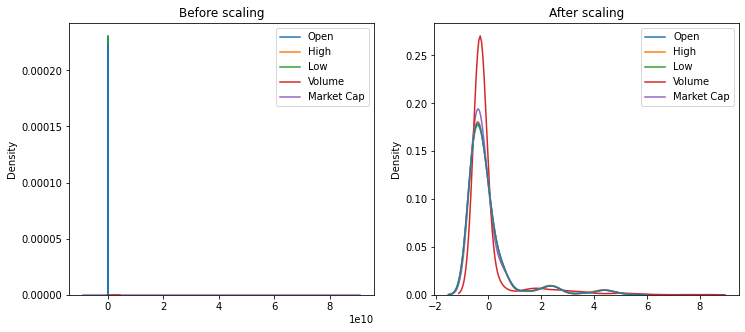

In [10]:
def data_visualize(columns, df1, df2, label1, label2):
  fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
  ax1.set_title(label1)
  sns.kdeplot(data=df1[columns], ax=ax1)
  ax2.set_title(label2)
  sns.kdeplot(data=df2[columns], ax=ax2)
  plt.show()

data_visualize(X_train.columns, X_train, scaled_X_1, 'Before scaling', 'After scaling')

Методом **MinMaxScaler**:

In [11]:
scaler2 = MinMaxScaler()
scaled_X_2 = arr_df(scaler2.fit_transform(X_train))
scaled_X_2

,Open,High,Low,Volume,Market Cap
0,0.052513,0.050630,0.054505,0.001695,0.045066
1,0.231496,0.227688,0.241385,0.051391,0.230838
2,0.360018,0.354708,0.356170,0.175786,0.358157
3,0.077067,0.086934,0.081229,0.005952,0.056208
4,0.831901,0.853227,0.869907,0.571011,0.831747
...,...,...,...,...,...
1201,0.432643,0.455566,0.442584,0.239256,0.430290
1202,0.113956,0.115809,0.119872,0.024301,0.113057
1203,0.127192,0.124259,0.129967,0.030787,0.124186
1204,0.078123,0.076674,0.082491,0.015047,0.076873


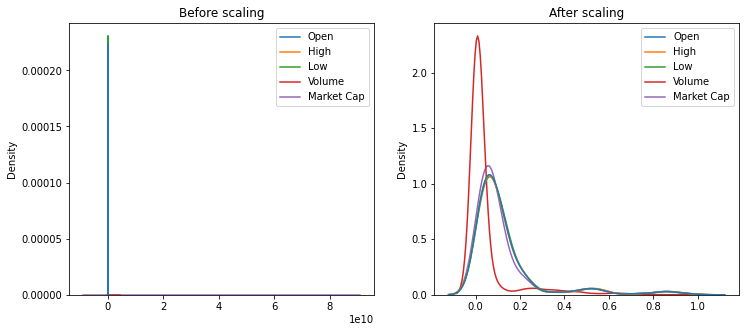

In [12]:
data_visualize(X_train.columns, X_train, scaled_X_2, 'Before scaling', 'After scaling')

Методом **RobustScaler**:

In [13]:
scaler3 = RobustScaler()
scaled_X_3 = arr_df(scaler3.fit_transform(X_train))
scaled_X_3

,Open,High,Low,Volume,Market Cap
0,-0.278985,-0.284228,-0.292637,-0.409656,-0.309974
1,1.659445,1.614061,1.745714,2.536048,1.919954
2,3.051379,2.975879,2.997695,9.909569,3.448253
3,-0.013053,0.105004,-0.001147,-0.157307,-0.176231
4,8.161986,8.320633,8.601151,33.336442,9.133047
...,...,...,...,...,...
1201,3.837924,4.057200,3.940238,13.671732,4.314106
1202,0.386460,0.414577,0.420341,0.930306,0.506164
1203,0.529813,0.505174,0.530454,1.314764,0.639752
1204,-0.001625,-0.004999,0.012614,0.381788,0.071816


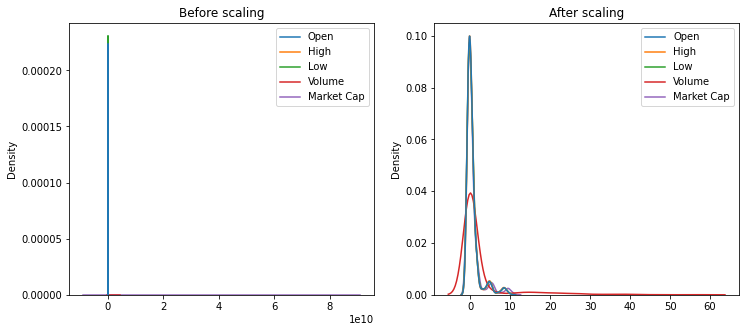

In [14]:
data_visualize(X_train.columns, X_train, scaled_X_3, 'Before scaling', 'After scaling')

# Обработка выбросов для числовых признаков

**Удаление выборсов**

In [15]:
def plot_for_analys(df, variable, title):
    fig, ax = plt.subplots(figsize=(15,7))
    plt.subplot(1, 2, 1)
    sns.violinplot(x=df[variable])    
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[variable])  
    fig.suptitle(title)
    plt.show()

In [16]:
from enum import Enum
class OutlierBoundaryType(Enum):
    SIGMA = 1
def get_outlier_boundaries(df, col, outlier_boundary_type: OutlierBoundaryType):
    if outlier_boundary_type == OutlierBoundaryType.SIGMA:
        K1 = 3
        lower_boundary = df[col].mean() - (K1 * df[col].std())
        upper_boundary = df[col].mean() + (K1 * df[col].std())

    else:
        raise NameError('Unknown Outlier Boundary Type')
        
    return lower_boundary, upper_boundary

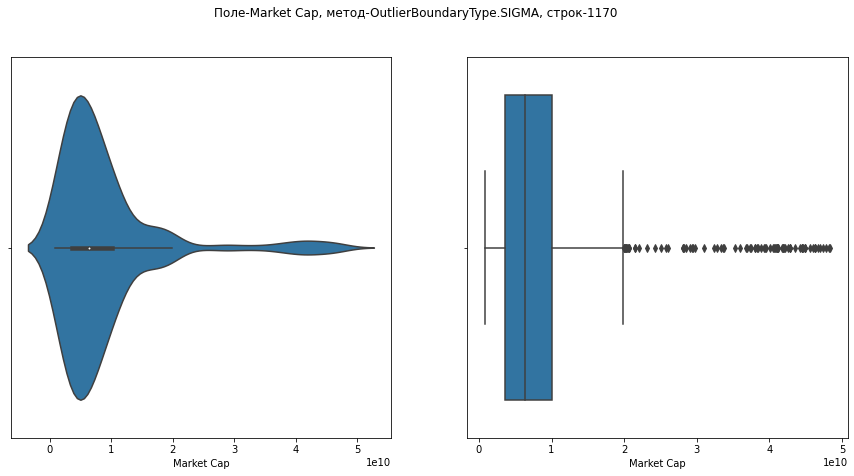

In [17]:
x_col_list = ['Market Cap']
data=X_train
for col in x_col_list:    
    for obt in OutlierBoundaryType:
        lower_boundary, upper_boundary = get_outlier_boundaries(data, col, obt)
        # Флаги для удаления выбросов
        outliers_temp = np.where(data[col] > upper_boundary, True, 
                                 np.where(data[col] < lower_boundary, True, False))
        # Удаление данных на основе флага
        data_trimmed = data.loc[~(outliers_temp), ]  
        title = 'Поле-{}, метод-{}, строк-{}'.format(col, obt, data_trimmed.shape[0])
        plot_for_analys(data_trimmed, col, title)

**Замена выбросов**

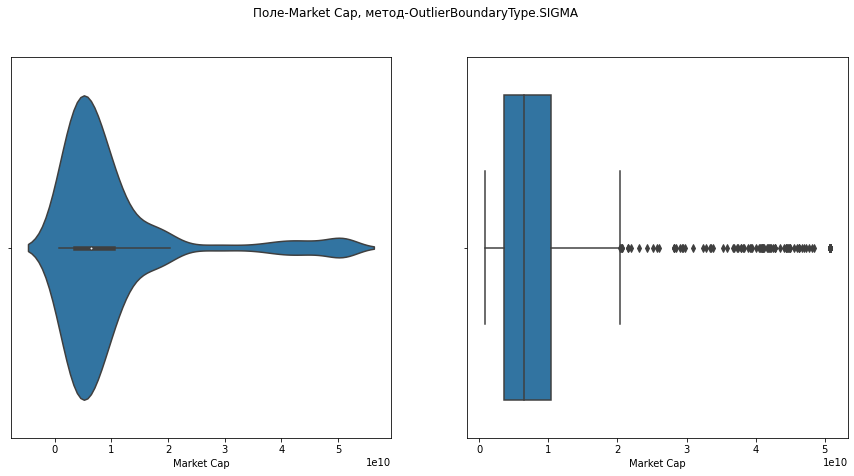

In [18]:
for col in x_col_list:    
    for obt in OutlierBoundaryType:
        lower_boundary, upper_boundary = get_outlier_boundaries(data, col, obt)
        data[col] = np.where(data[col] > upper_boundary, upper_boundary, 
                                 np.where(data[col] < lower_boundary, lower_boundary, data[col]))
        title = 'Поле-{}, метод-{}'.format(col, obt)
        plot_for_analys(data, col, title)

# Обработка по крайней мере одного нестандартного признака

In [19]:
dataset.head()

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Market Cap
0,0,2017-09-22,3628.02,3758.27,3553.53,3630.70,1.194830e+09,60152300000
1,1,2017-09-21,3901.47,3916.42,3613.63,3631.04,1.411480e+09,64677600000
2,2,2017-09-20,3916.36,4031.39,3857.73,3905.95,1.213830e+09,64918500000
3,3,2017-09-19,4073.79,4094.07,3868.87,3924.97,1.563980e+09,67520300000
4,4,2017-09-18,3591.09,4079.23,3591.09,4065.20,1.943210e+09,59514100000


In [20]:
dataset['Date'] = dataset.apply(lambda x: pd.to_datetime(x['Date'], format='%Y-%m-%d'), axis=1)

In [21]:
# День
dataset['day'] = dataset['Date'].dt.day
# Месяц
dataset['month'] = dataset['Date'].dt.month
# Год
dataset['year'] = dataset['Date'].dt.year
#Неделя года
dataset['week'] = dataset['Date'].dt.isocalendar().week
#День недели 
dataset['dayofweek'] = dataset['Date'].dt.dayofweek
#Выходной день
dataset['day_name'] = dataset['Date'].dt.day_name()
dataset['is_holiday'] = dataset.apply(lambda x: 1 if x['Date'].dayofweek in [5,6] else 0, axis=1)

In [22]:
dataset.head()

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Market Cap,day,month,year,week,dayofweek,day_name,is_holiday
0,0,2017-09-22,3628.02,3758.27,3553.53,3630.70,1.194830e+09,60152300000,22,9,2017,38,4,Friday,0
1,1,2017-09-21,3901.47,3916.42,3613.63,3631.04,1.411480e+09,64677600000,21,9,2017,38,3,Thursday,0
2,2,2017-09-20,3916.36,4031.39,3857.73,3905.95,1.213830e+09,64918500000,20,9,2017,38,2,Wednesday,0
3,3,2017-09-19,4073.79,4094.07,3868.87,3924.97,1.563980e+09,67520300000,19,9,2017,38,1,Tuesday,0
4,4,2017-09-18,3591.09,4079.23,3591.09,4065.20,1.943210e+09,59514100000,18,9,2017,38,0,Monday,0


In [23]:
dataset['now'] = datetime.datetime.today()
dataset['diff'] = dataset['now'] - dataset['Date']
dataset.dtypes

Unnamed: 0              int64
Date           datetime64[ns]
Open                  float64
High                  float64
Low                   float64
Close                 float64
Volume                float64
Market Cap              int64
day                     int64
month                   int64
year                    int64
week                   UInt32
dayofweek               int64
day_name               object
is_holiday              int64
now            datetime64[ns]
diff          timedelta64[ns]
dtype: object

In [24]:
dataset.head()

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Market Cap,day,month,year,week,dayofweek,day_name,is_holiday,now,diff
0,0,2017-09-22,3628.02,3758.27,3553.53,3630.70,1.194830e+09,60152300000,22,9,2017,38,4,Friday,0,2021-05-10 18:00:02.748699,1326 days 18:00:02.748699
1,1,2017-09-21,3901.47,3916.42,3613.63,3631.04,1.411480e+09,64677600000,21,9,2017,38,3,Thursday,0,2021-05-10 18:00:02.748699,1327 days 18:00:02.748699
2,2,2017-09-20,3916.36,4031.39,3857.73,3905.95,1.213830e+09,64918500000,20,9,2017,38,2,Wednesday,0,2021-05-10 18:00:02.748699,1328 days 18:00:02.748699
3,3,2017-09-19,4073.79,4094.07,3868.87,3924.97,1.563980e+09,67520300000,19,9,2017,38,1,Tuesday,0,2021-05-10 18:00:02.748699,1329 days 18:00:02.748699
4,4,2017-09-18,3591.09,4079.23,3591.09,4065.20,1.943210e+09,59514100000,18,9,2017,38,0,Monday,0,2021-05-10 18:00:02.748699,1330 days 18:00:02.748699


# Отбор признаков из группы методов фильтрации (корреляция признаков)

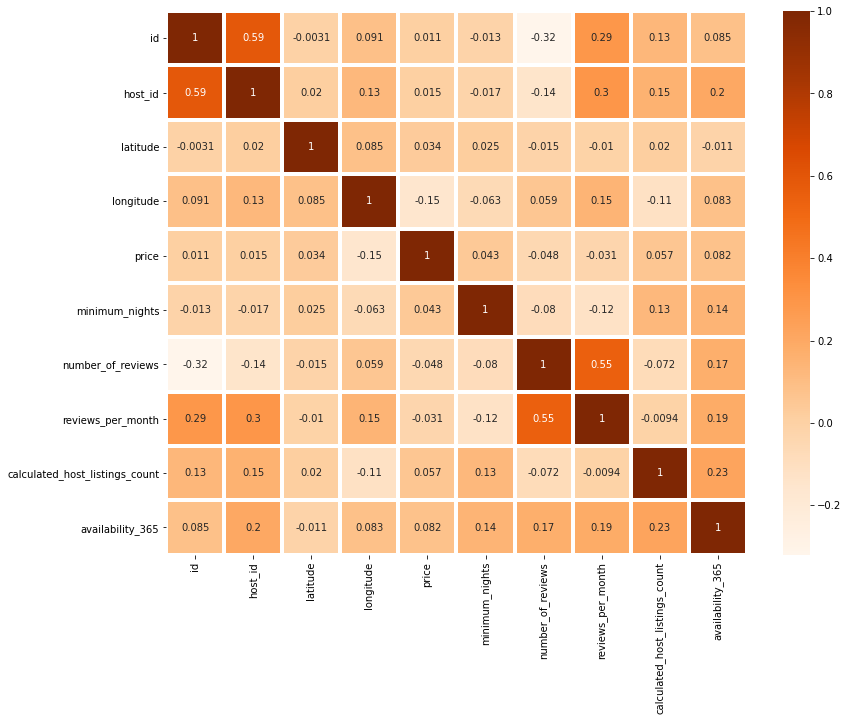

In [25]:
data_dir2 = "/content/drive/MyDrive/dataset/housing/AB_NYC_2019.csv"
data=pd.read_csv(data_dir2)
plt.figure(figsize=(13,10))
sns.heatmap(data.corr(), cmap="Oranges", annot=True, linewidths=3)

In [30]:
def make_corr_df(df):
    cr = data.corr()
    cr = cr.abs().unstack() 
    cr = cr.sort_values(ascending=False)
    cr = cr[cr >= 0.53]
    cr = cr[cr < 1]
    cr = pd.DataFrame(cr).reset_index()
    cr.columns = ['f1', 'f2', 'corr']
    return cr

In [31]:
make_corr_df(data)

,f1,f2,corr
0,id,host_id,0.588290
1,host_id,id,0.588290
2,number_of_reviews,reviews_per_month,0.549868
3,reviews_per_month,number_of_reviews,0.549868


In [32]:
def corr_groups(cr):
    grouped_feature_list = []
    correlated_groups = []

    for feature in cr['f1'].unique():
        if feature not in grouped_feature_list:
            # находим коррелирующие признаки
            correlated_block = cr[cr['f1'] == feature]
            cur_dups = list(correlated_block['f2'].unique()) + [feature]
            grouped_feature_list = grouped_feature_list + cur_dups
            correlated_groups.append(cur_dups)
    return correlated_groups

In [33]:
# Группы коррелирующих признаков
corr_groups(make_corr_df(data))

[['host_id', 'id'], ['reviews_per_month', 'number_of_reviews']]

Видно, что две группы признаков с сильной корреляцией:  
id----host_id  
number_of_reviews----reviews_per_month  
Поэтому удалим из датасета **host_id** и **reviews_per_month**

In [26]:
data=data.drop(['host_id','reviews_per_month'],axis=1)
data.head()

,id,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,6,365
1,2595,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,1,0


# Отбор признаков из группы методов обертывания (алгоритм полного перебора)

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
data=pd.read_csv(data_dir2)
X=data[['latitude','longitude','minimum_nights','number_of_reviews','calculated_host_listings_count','availability_365']]
y=data[['price']]
X_train,X_test,y_train,y_test=train_test_split(X,y)
knn = KNeighborsClassifier(n_neighbors=3)
efs1 = EFS(knn, 
           min_features=2,
           max_features=4,
           scoring='accuracy',
           print_progress=True,
           cv=5)

efs1 = efs1.fit(X_train, y_train, custom_feature_names=X.columns)

print('Best accuracy score: %.2f' % efs1.best_score_)
print('Best subset (indices):', efs1.best_idx_)
print('Best subset (corresponding names):', efs1.best_feature_names_)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
Features: 50/50

Best accuracy score: 0.06
Best subset (indices): (0, 1, 2, 4)
Best subset (corresponding names): ('latitude', 'longitude', 'minimum_nights', 'calculated_host_listings_count')


# Отбор признаков из группы методов вложения (линейная регрессия)

In [35]:
from sklearn.linear_model import Lasso
# Используем L1-регуляризацию
e_ls1 = Lasso(random_state=1)
e_ls1.fit(X_train, y_train)
# Коэффициенты регрессии
list(zip(X_train.columns, e_ls1.coef_))

[('latitude', 0.0),
 ('longitude', -328.42130692400286),
 ('minimum_nights', 0.17313726132768772),
 ('number_of_reviews', -0.3095591266008044),
 ('calculated_host_listings_count', 0.16891958191548065),
 ('availability_365', 0.174944666565565)]

In [36]:
from sklearn.feature_selection import SelectFromModel
sel_e_ls1 = SelectFromModel(e_ls1)
sel_e_ls1.fit(X_train, y_train)
list(zip(X_train.columns, sel_e_ls1.get_support()))

[('latitude', False),
 ('longitude', True),
 ('minimum_nights', True),
 ('number_of_reviews', True),
 ('calculated_host_listings_count', True),
 ('availability_365', True)]